
<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" heiht= 250 width= 250 alt=" ">

|Fecha|Email|
|-----|-----|
|26 de agosto 2020|luishernandezmatos@yahoo.com

# Stock Market Sentiment Analysis Using Python & Machine Learning  

**Author:** Computer Scince  
**Video:** [CS](https://www.youtube.com/watch?v=4OlvGGAsj8I)  

### Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

### Upload datasets

In [6]:
df1 = pd.read_csv('Combined_News_DJIA.csv')
df2 = pd.read_csv('datasets_129_792900_upload_DJIA_table.csv')
df3 = pd.read_csv('RedditNews.csv')

In [7]:
df1.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [9]:
df1.shape

(1989, 27)

In [10]:
df2.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [11]:
df2.shape

(1989, 7)

In [12]:
df3.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [13]:
df3.shape

(73608, 2)

In [14]:
df_all = df1.merge(df2, how='inner', on='Date', left_index=True )
df_all.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [15]:
df_all.shape

(1989, 33)

### Combine columns

In [16]:
df1.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [30]:
df4 = df1.drop(['Date', 'Label'], axis = 'columns')

In [34]:
df_all['combine_sentiment'] = df4.apply(lambda x: " ".join([str(x[i]) for i in range(len(x))]),axis=1) 

In [35]:
df_all.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,combine_sentiment
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,A 117-year-old woman in Mexico City finally re...
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Jamaica proposes marijuana dispensers for tour...


In [36]:
df_all.combine_sentiment[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

### Clean data

In [44]:
df_all['combine_sentiment'] = df_all.combine_sentiment.str.replace("b[(')]", '').str.replace('b[(")]', '').str.replace("\'", '')

In [47]:
df_all.combine_sentiment[20]

'A French judge has ordered two branches of Scientologists and their leaders to stand trial for fraud   Russia in legal bid to ban South Park 60 Minutes Cut Ahmadinejads Statement, Solution Is Democracy in Israel/Palestine" U.S. drones kill 13 in missile attack in Pakistan Screw You, TSA: No Conviction on Key Charges in Liquid-Bomb Trial in London Scientology on trial for fraud in France! An EU ban on ads with sexist overtones? Another quasi-fictional piece of translucent flimflam Film Backs Afghans Claims of US Killings [of 90+ civilians] Giant Buddha found at Afghan site. After denying strenously the US reopens inquiry into Afghan attack that may have killed upto 90 civilians Videos surface showing dead Afghan children after US raid, sparking a new investigation "Consortium" of Media Execs to Canadian Green Party:  You can\\t participate in debate because the other parties don\\t want you there. Everything going wrong in the world .. in one convenient graphical display.  Until yester

### Create subjectivity and polarity

In [48]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [50]:
df_all['subjectivity'] = df_all['combine_sentiment'].apply(getSubjectivity)
df_all['polarity'] = df_all['combine_sentiment'].apply(getPolarity)

In [51]:
df_all.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,combine_sentiment,subjectivity,polarity
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,A 117-year-old woman in Mexico City finally re...,0.320261,-0.035458
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243


### Sentiment scores

In [52]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [55]:
compound = []
neg = []
neu = []
pos = []

for i in range(0, len(df_all['combine_sentiment'])):
    SIA = getSIA(df_all['combine_sentiment'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [56]:
df_all['compound'] = compound
df_all['negative'] = neg
df_all['neutral'] = neu
df_all['positive'] = pos

In [57]:
df_all.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,combine_sentiment,subjectivity,polarity,compound,negative,neutral,positive
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,212830000,11734.320312,A 117-year-old woman in Mexico City finally re...,0.320261,-0.035458,-0.9982,0.235,0.724,0.041
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.349609,183190000,11782.349609,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243,-0.9858,0.191,0.721,0.089


### Keep columns

In [63]:
keep_columns =['Open', 'High', 'Low', 'Close', 'Volume','subjectivity', 'polarity', 'compound', 'negative','neutral', 'positive', 'Label']
df = df_all[keep_columns]

In [64]:
df.head(2)

,Open,High,Low,Close,Volume,subjectivity,polarity,compound,negative,neutral,positive,Label
1988,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.320261,-0.035458,-0.9982,0.235,0.724,0.041,0
1987,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.382566,0.011243,-0.9858,0.191,0.721,0.089,1


### feature and response

In [65]:
X = df.drop('Label', axis = 1)
y = df.Label

In [66]:
X.shape, y.shape

((1989, 11), (1989,))

### Train the data with 80%

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1591, 11), (1591,), (398, 11), (398,))

### Create the model

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [71]:
y_predict = model.predict(X_test)

In [72]:
result= pd.DataFrame({'Actual': y_test, 'Predictec': y_predict})
result.head()

,Actual,Predictec
696,1,1
678,1,1
1028,0,0
1881,0,0
432,0,1


### Evaluate

In [82]:
result['diference'] = result.Actual - result.Predictec

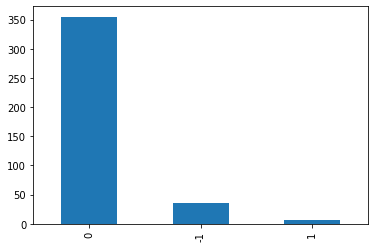

In [86]:
result.diference.value_counts().plot(kind='bar')

In [87]:
result.diference.value_counts()

 0    355
-1     36
 1      7
Name: diference, dtype: int64

In [83]:
result[result.diference == 1]

,Actual,Predictec,diference
507,1,0,1
1755,1,0,1
69,1,0,1
362,1,0,1
1312,1,0,1
1969,1,0,1
1612,1,0,1


In [81]:
result[result.diference == -1]

,Actual,Predictec,diference
432,0,1,-1
1301,0,1,-1
864,0,1,-1
900,0,1,-1
1095,0,1,-1
1773,0,1,-1
1709,0,1,-1
728,0,1,-1
1806,0,1,-1
1275,0,1,-1


### Scores

In [89]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       193
           1       0.85      0.97      0.90       205

    accuracy                           0.89       398
   macro avg       0.90      0.89      0.89       398
weighted avg       0.90      0.89      0.89       398

